Nama : Andreas Restuawanta Christwara

NIM : 5312422036

Prodi : Teknik Komputer

Matkul : Pengolahan Sinyal Digital

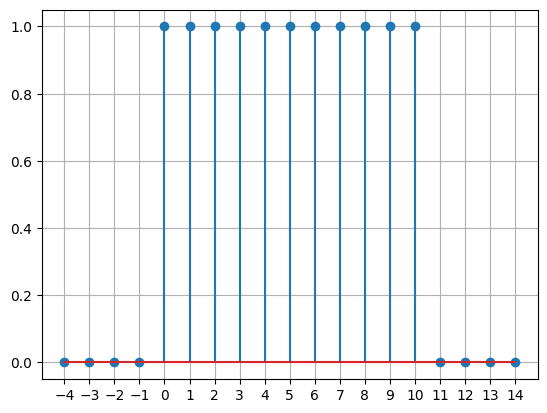

In [3]:
import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0)
plt.figure()
plt.stem(np.arange(-4, L+4, step=1), h)
plt.xticks(np.arange(-4, L+4, step=1))
plt.grid();

Source code tersebut menggunakan library NumPy dan Matplotlib dalam Python untuk membuat dan memvisualisasikan sebuah sinyal digital sederhana dalam bentuk plot stem (batang).

1.	import numpy as np dan import matplotlib.pyplot as plt adalah untuk mengimpor library NumPy dan Matplotlib yang dibutuhkan.
2.	L=11 mendefinisikan panjang sinyal digital yang akan dibuat.
3.	h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0) membuat sinyal digital dengan menggabungkan tiga array NumPy:
  *   np.zeros(4) membuat array dengan 4 nilai 0 (representasi sinyal rendah)
  *   np.ones(L) membuat array dengan L (11) nilai 1 (representasi sinyal tinggi)
  *   np.zeros(4) membuat array dengan 4 nilai 0 lagi (representasi sinyal rendah)
  *   Ketiga array ini digabungkan pada sumbu 0 (secara vertikal) menggunakan np.concatenate.
4.	plt.figure() membuat figure (kanvas) baru untuk memplot.
5.	plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True) memplot sinyal digital h pada sumbu x yang dihasilkan dari np.arange(-4, L+4, step=1) dengan menggunakan plot stem (batang).
6.	plt.xticks(np.arange(-4, L+4, step=1)) menetapkan nilai tick (tanda) pada sumbu x sesuai dengan nilai pada np.arange(-4, L+4, step=1).
7.	plt.grid() menambahkan grid (garis bantuan) pada plot.

Ketika kode ini dijalankan, akan menampilkan plot stem (batang) yang merepresentasikan sinyal digital dengan 4 nilai 0 (rendah), diikuti 11 nilai 1 (tinggi), dan 4 nilai 0 (rendah) lagi. Sumbu x menunjukkan indeks sampel sinyal.

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), Checkbox(value=False, description=…

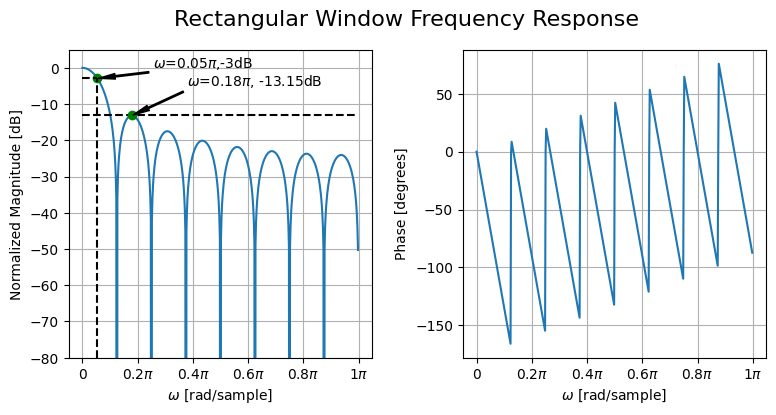

In [5]:
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L),np.zeros(4)),axis=0)
    omega, H =signal.freqz(h[:-4],worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H)/np.abs(H).max())
    p3dB=np.max(H_dB)-3
    p3dBIndex= np.max(np.where(H_dB >= p3dB))
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp,'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--')
    ax1.plot((wp, wp), (-80, Hp), 'k--')
    ax1.set_ylim((-80,H_dB.max()+5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp+0.2*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--')
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe]+0.2*np.pi, -5),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')


    ax2.clear()
    phase=np.angle(H,deg=True)
    if unwrap:
        phase=np.unwrap(phase)
    ax2.plot(omega,phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')

Source code tersebut adalah sebuah visualisasi interaktif menggunakan library IPython Widgets, NumPy, SciPy, dan Matplotlib untuk menampilkan respons frekuensi dari jendela persegi panjang (rectangular window) dalam domain frekuensi.

1.	Importing library yang diperlukan.
2.	@interact digunakan untuk membuat widget interaktif dengan widgets.IntSlider yang memungkinkan pengguna untuk mengubah panjang jendela L dengan rentang nilai antara 2 hingga 128.
3.	Fungsi plot_recWindow_H didefinisikan untuk memvisualisasikan respons frekuensi jendela persegi panjang.
4.	Sinyal jendela persegi panjang h dibuat dengan menggabungkan array np.ones(L) dan np.zeros(4).
5.	signal.freqz digunakan untuk menghitung respons frekuensi H dari sinyal h.
6.	Beberapa perhitungan dilakukan untuk mencari frekuensi cutoff -3dB (wp), magnitude pada frekuensi cutoff (Hp), dan side lobe pertama (side_lobe).
7.	Subplot pertama (ax1) digunakan untuk memvisualisasikan magnitude respons frekuensi H_dB dalam skala desibel (dB).
8.	Garis putus-putus ditambahkan pada subplot pertama untuk menunjukkan frekuensi cutoff -3dB dan side lobe pertama.
9.	Anotasi ditambahkan untuk menunjukkan nilai frekuensi dan magnitude pada titik-titik penting.
10.	Sumbu x diformat dengan menggunakan FuncFormatter dan MultipleLocator untuk menampilkan nilai dalam bentuk pi.
11.	Subplot kedua (ax2) digunakan untuk memvisualisasikan respons fase dari H.
12.	Terdapat opsi unwrap untuk menghilangkan ambiguitas fase (unwrapping).
13.	Sumbu x pada subplot kedua juga diformat dengan FuncFormatter dan MultipleLocator.

Dengan menggunakan widget slider, pengguna dapat mengubah panjang jendela L dan mengamati perubahan respons frekuensi jendela persegi panjang secara interaktif pada kedua subplot.

In [6]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer=True)

n_d_s=(L_s-1)/2
h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

Source code tersebut menggunakan library SymPy dalam Python untuk mendefinisikan dan memanipulasi ekspresi simbolik yang merepresentasikan respons impuls dari filter sinc ideal.

1.	from sympy import sin, symbols, simplify, pi, lambdify, limit : Mengimpor fungsi dan simbol yang diperlukan dari library SymPy.
2.	wc_s = symbols('\omega_c') : Mendefinisikan simbol \omega_c (omega_c) sebagai frekuensi cutoff.
3.	n_s, L_s = symbols('n L', integer=True) : Mendefinisikan simbol n dan L sebagai bilangan bulat, di mana n mewakili indeks sampel dan L mewakili panjang filter.
4.	n_d_s=(L_s-1)/2 : Mendefinisikan ekspresi simbolik untuk n_d (indeks tengah filter) sebagai (L-1)/2.
5.	h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s)) : Mendefinisikan ekspresi simbolik h_n_s yang merupakan respons impuls dari filter sinc ideal, dengan sin(wc_s*(n-n_d))/(pi*(n-n_d)).
6.	h_n_s : Mencetak ekspresi simbolik h_n_s yang telah didefinisikan sebelumnya.

In [7]:
h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

Source code tersebut melanjutkan dari ekspresi simbolik respons impuls filter sinc ideal h_n_s yang telah didefinisikan sebelumnya. Kode ini menghitung nilai h_0_s yang merupakan nilai respons impuls di tengah filter, yaitu pada n = n_d.

1.	h_0_s = limit(h_n_s, n_s, n_d_s) : Fungsi limit dari SymPy digunakan untuk menghitung limit dari ekspresi h_n_s ketika n_s mendekati n_d_s. Ini efektif menghitung nilai h_n_s pada n = n_d.
2.	h_0_s : Mencetak nilai h_0_s yang telah dihitung.

Dalam konteks filter sinc ideal, nilai h[n_d] (atau h[0] untuk filter dengan panjang ganjil) adalah nilai tertinggi dari respons impuls. Nilai ini penting karena menentukan penguatan atau amplifikasi yang diberikan oleh filter pada frekuensi yang dilewatkan (passband).

Dengan menghitung limit(h_n_s, n_s, n_d_s), kita mendapatkan nilai h_0_s yang merupakan nilai maksimum dari respons impuls filter sinc ideal. Nilai ini berguna untuk normalisasi atau scaling dalam perancangan dan implementasi filter sinc.

Kode ini memungkinkan kita untuk mengeksplorasi sifat-sifat respons impuls filter sinc ideal secara simbolik menggunakan library SymPy, yang dapat membantu dalam analisis dan perancangan filter.

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

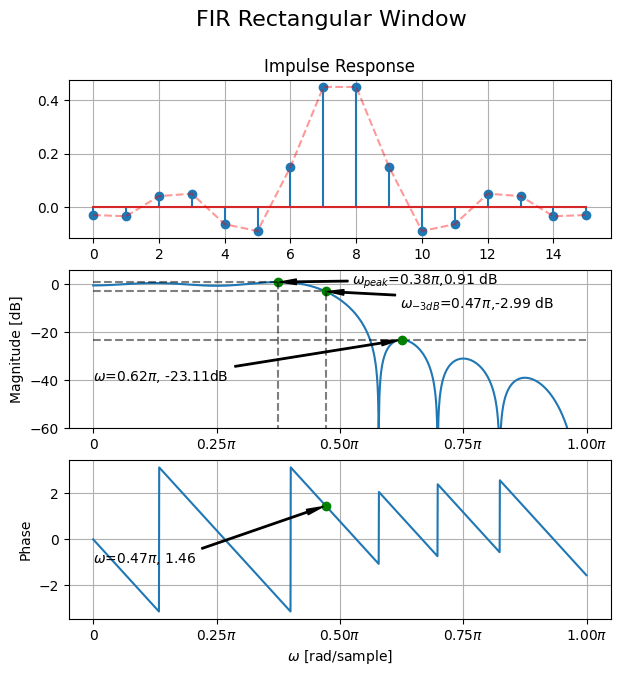

In [10]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()

    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)

    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]),
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5)
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5)
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]),
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)

Source code tersebut adalah sebuah visualisasi interaktif menggunakan IPython Widgets, NumPy, SciPy, dan Matplotlib untuk menampilkan respons impuls, magnitude, dan fase dari sebuah filter FIR (Finite Impulse Response) dengan jendela persegi panjang (rectangular window).

1.	h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy') mengubah ekspresi simbolik h_n_s menjadi fungsi NumPy yang dapat dievaluasi menggunakan nilai numerik.
2.	Membuat plot dengan 3 subplot (ax1, ax2, ax3) dengan ukuran dan jarak tertentu.
3.	Fungsi plot_h didefinisikan dengan menggunakan @interact untuk memvisualisasikan respons impuls, magnitude, dan fase filter FIR.
4.	Widget widgets.IntSlider digunakan untuk mengatur panjang filter L dengan rentang nilai 2 hingga 128.
5.	Widget widgets.FloatSlider digunakan untuk mengatur frekuensi cutoff normalisasi wc dengan rentang nilai 0.1 hingga 1.
6.	Respons impuls h dihitung dengan menggunakan fungsi h_n yang sebelumnya didefinisikan sebagai fungsi NumPy.
7.	Subplot ax1 digunakan untuk memvisualisasikan respons impuls h menggunakan plot stem.
8.	Subplot ax2 digunakan untuk memvisualisasikan magnitude respons frekuensi H_dB dalam skala desibel (dB).
9.	Titik-titik penting seperti frekuensi cutoff -3dB (wp), magnitude pada frekuensi cutoff (Hp), magnitude puncak (max_peak_ind), dan side lobe pertama (side_lobe) ditandai dengan garis putus-putus dan anotasi.
10.	Sumbu x pada subplot ax2 diformat dengan menggunakan FuncFormatter dan MultipleLocator untuk menampilkan nilai dalam bentuk pi.
11.	Subplot ax3 digunakan untuk memvisualisasikan respons fase dari H.
12.	Terdapat opsi unwrap untuk menghilangkan ambiguitas fase (unwrapping) dan menghitung delay grup pada frekuensi cutoff.
13.	Sumbu x pada subplot ax3 juga diformat dengan FuncFormatter dan MultipleLocator.
14.	Titik pada frekuensi cutoff -3dB (wp) dan nilai fasenya ditandai dengan garis putus-putus dan anotasi pada subplot ax3.

Dengan menggunakan widget slider, pengguna dapat mengubah panjang filter L dan frekuensi cutoff normalisasi wc secara interaktif dan mengamati perubahan respons impuls, magnitude, dan fase dari filter FIR dengan jendela persegi panjang.